### prepare

In [1]:
# import
# pip3 install -U scikit-learn
# sudo pacman -S python-scikit-learn
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#from google.colab import files
import tensorflow as tf
import math

# data
x_data = np.array([[0.67003],[0.64003],[0.61003],[0.58002],[0.55002],[0.52002],[0.49001],[0.46001],[0.43001],[0.40001],[0.37001],[0.34001],[0.31001],[0.28000]])
y_data = np.array([[0.72512],[0.73310],[0.72671],[0.72343],[0.71180],[0.69758],[0.68061],[0.65528],[0.62858],[0.59563],[0.55927],[0.51316],[0.45432],[0.38027]])
x_data = MinMaxScaler().fit_transform(x_data)
y_data = MinMaxScaler().fit_transform(y_data)

# shape
print("x shape is ", x_data.shape)
print("y shape is ", y_data.shape)

x shape is  (14, 1)
y shape is  (14, 1)


### show

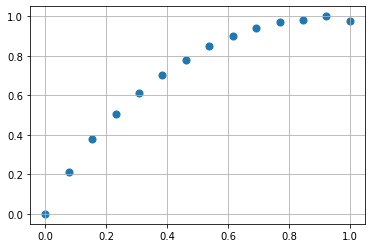

<Figure size 432x288 with 0 Axes>

In [2]:
# plot
plt.scatter(x_data[::1], y_data[::1], s=50)
plt.grid()
plt.show()
plt.savefig('dataset.png',dpi=300)
#files.download('dataset.png') 

### model

In [3]:
# roberto
n_features = x_data.shape[1]
inputs  = keras.Input(shape=(n_features,))
dense   = keras.layers.Dense(512, activation="relu")
x       = dense(inputs)
x       = keras.layers.Dense(256, activation="relu")(x)
x       = keras.layers.Dense(128, activation="relu")(x)
x       = keras.layers.Dense(64, activation="relu")(x)
x       = keras.layers.Dense(16, activation="relu")(x)
outputs = keras.layers.Dense(1)(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 512)               1024      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 1)                 17    

2022-08-21 08:58:09.495328: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 08:58:09.566737: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 08:58:09.566974: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 08:58:09.567552: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

### train

In [4]:
# 300,64
model.fit(x_data, y_data, batch_size=64, epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 583ms/step - loss: 0.5947
Epoch 2/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5387
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 0.4817
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 0.4278
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 0.3717
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 0.3102
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2449
Epoch 8/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1784
Epoch 9/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1144
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0591
Epoch 11/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 12/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 13/300
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 105/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 106/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 107/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 108/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 109/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 110/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 111/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 112/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 113/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 114/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 115/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 116/300
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 3.2843e-05
Epoch 203/300
1/1 [==============================] - 0s 2ms/step - loss: 3.2695e-05
Epoch 204/300
1/1 [==============================] - 0s 2ms/step - loss: 3.2501e-05
Epoch 205/300
1/1 [==============================] - 0s 2ms/step - loss: 3.2260e-05
Epoch 206/300
1/1 [==============================] - 0s 2ms/step - loss: 3.2016e-05
Epoch 207/300
1/1 [==============================] - 0s 1ms/step - loss: 3.1828e-05
Epoch 208/300
1/1 [==============================] - 0s 3ms/step - loss: 3.1706e-05
Epoch 209/300
1/1 [==============================] - 0s 3ms/step - loss: 3.1606e-05
Epoch 210/300
1/1 [==============================] - 0s 2ms/step - loss: 3.1496e-05
Epoch 211/300
1/1 [==============================] - 0s 2ms/step - loss: 3.1378e-05
Epoch 212/300
1/1 [==============================] - 0s 2ms/step - loss: 3.1254e-05
Epoch 213/300
1/1 [==============================] - 0s 2ms/step - loss: 3.1114e-05
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 2.0175e-05
Epoch 300/300
1/1 [==============================] - 0s 2ms/step - loss: 2.0054e-05


### predict

1/1 [==============================] - 0s 106ms/step


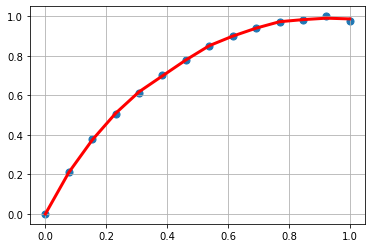

In [5]:
# from input
y_predicted = model.predict(x_data)

# plot
plt.scatter(x_data[::1], y_data[::1], s=50)
plt.plot(x_data, y_predicted, 'r', linewidth=3)
plt.grid()
#plt.show()
plt.savefig('training.png', dpi=300)
#files.download("training.png") 

### video


In [6]:
#for x in range(100):
#  # One epoch
#  model.fit( x_data, y_data, epochs=1, verbose=1)
#
#  # Compute the output 
#  y_predicted = model.predict(x_data)
#
#  # Display the result
#  plt.scatter(x_data[::1], y_data[::1], s=2)
#  plt.plot(x_data, y_predicted, 'r', linewidth=4)
#  plt.grid()
#  plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
#  plt.ylim(bottom=-1.2)  
#  #plt.show()
#  plt.savefig('training-' + str(x) +'-epochs.png',dpi=300)
#  #files.download('training-' + str(x) +'-epochs.png') 
#  plt.clf()

